In [9]:
# conduct PCA on the data
# and visualise

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotnine as pn
import plotnine3d as pn3
from sklearn.cluster import KMeans

from classification import Pipeline

In [2]:
def plot_PCA(X, y, title="PCA Analysis"):
    dataset = pd.DataFrame(X)
    labels = y

    components = PCA(n_components=2).fit_transform(dataset)
    pca_dataset = pd.DataFrame(components, columns=['pc1', 'pc2'])

    pca_dataset = pd.concat([pca_dataset, pd.DataFrame(labels)], axis=1)
    pca_dataset.rename(columns={0: 'label'}, inplace=True)
    pca_dataset['label'] = pca_dataset['label'].astype('bool')

    pca_plot = (
        pn.ggplot(pca_dataset, pn.aes(
            x='pc1',
            y='pc2',
            color='label')
        )
        + pn.geom_point()

        + pn.ggtitle('PCA of 2 components')

        + pn.theme_538()
        + pn.scale_color_discrete(labels=['fake', 'real'])
        + pn.theme(plot_title=pn.element_text(hjust=0.5))
    )

    # 3D plot of PCA with 3 components
    components = PCA(n_components=3).fit_transform(dataset)
    pca_dataset = pd.DataFrame(components, columns=['pc1', 'pc2', 'pc3'])

    pca_dataset = pd.concat([pca_dataset, pd.DataFrame(labels)], axis=1)
    pca_dataset.rename(columns={0: 'label'}, inplace=True)
    pca_dataset['label'] = pca_dataset['label'].astype('bool')

    pca_plot_3d = (
        pn3.ggplot_3d(pca_dataset, pn.aes(
            x='pc1',
            y='pc2',
            z='pc3',
            color='label')
        )
        + pn3.geom_point_3d()

        + pn.ggtitle('PCA of 3 components')

        + pn.theme_seaborn()
        + pn.scale_color_discrete(labels=['fake', 'real'])
        + pn.theme(plot_title=pn.element_text(hjust=0.5))
    )

    return pca_plot_3d

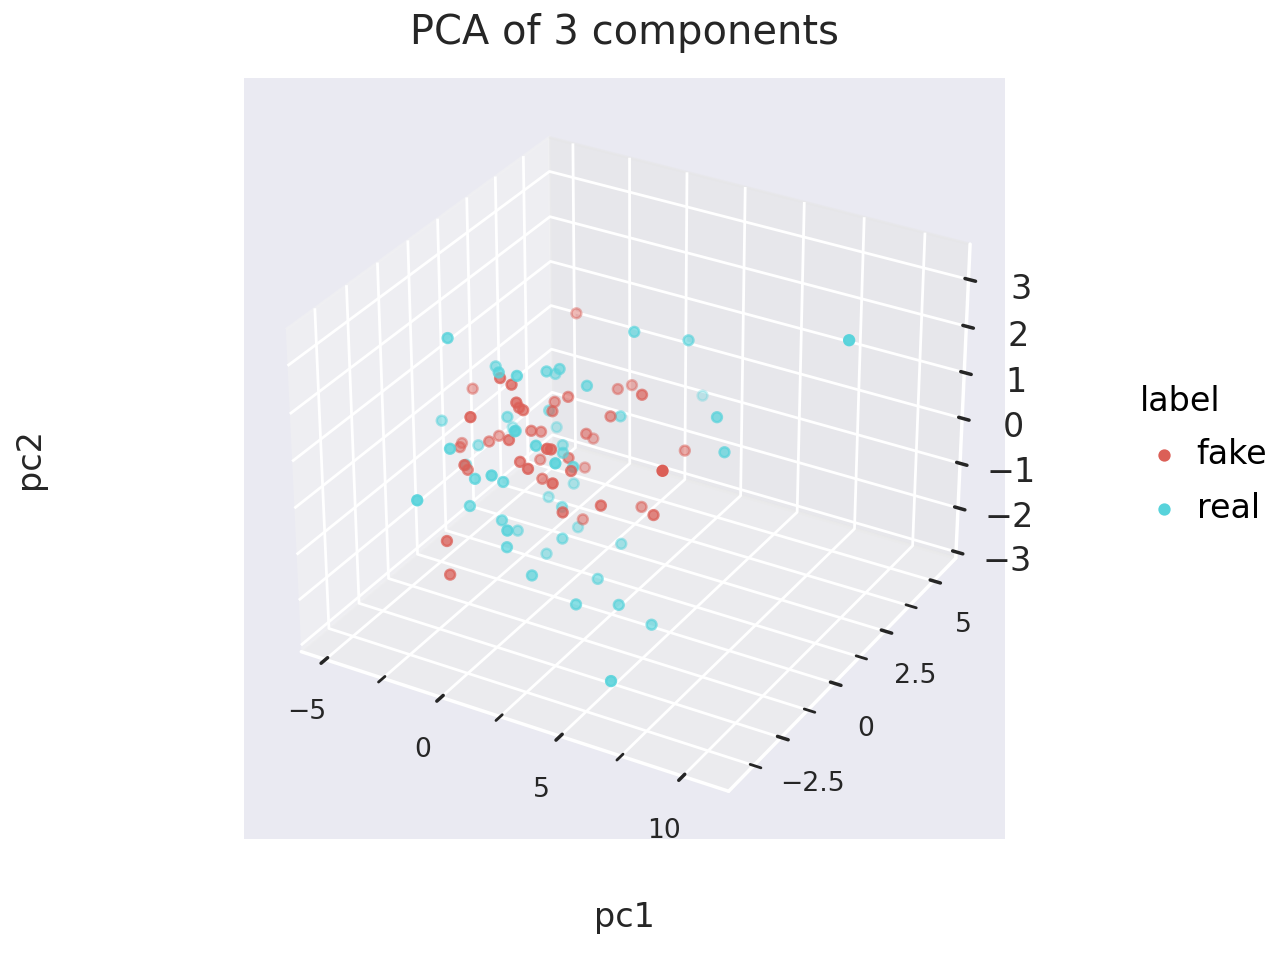

In [3]:
pipeline = Pipeline(similarity=False, non_latent=None)
X, y = pipeline.load_dataset_from_file().all
plot_PCA(X, y).draw()

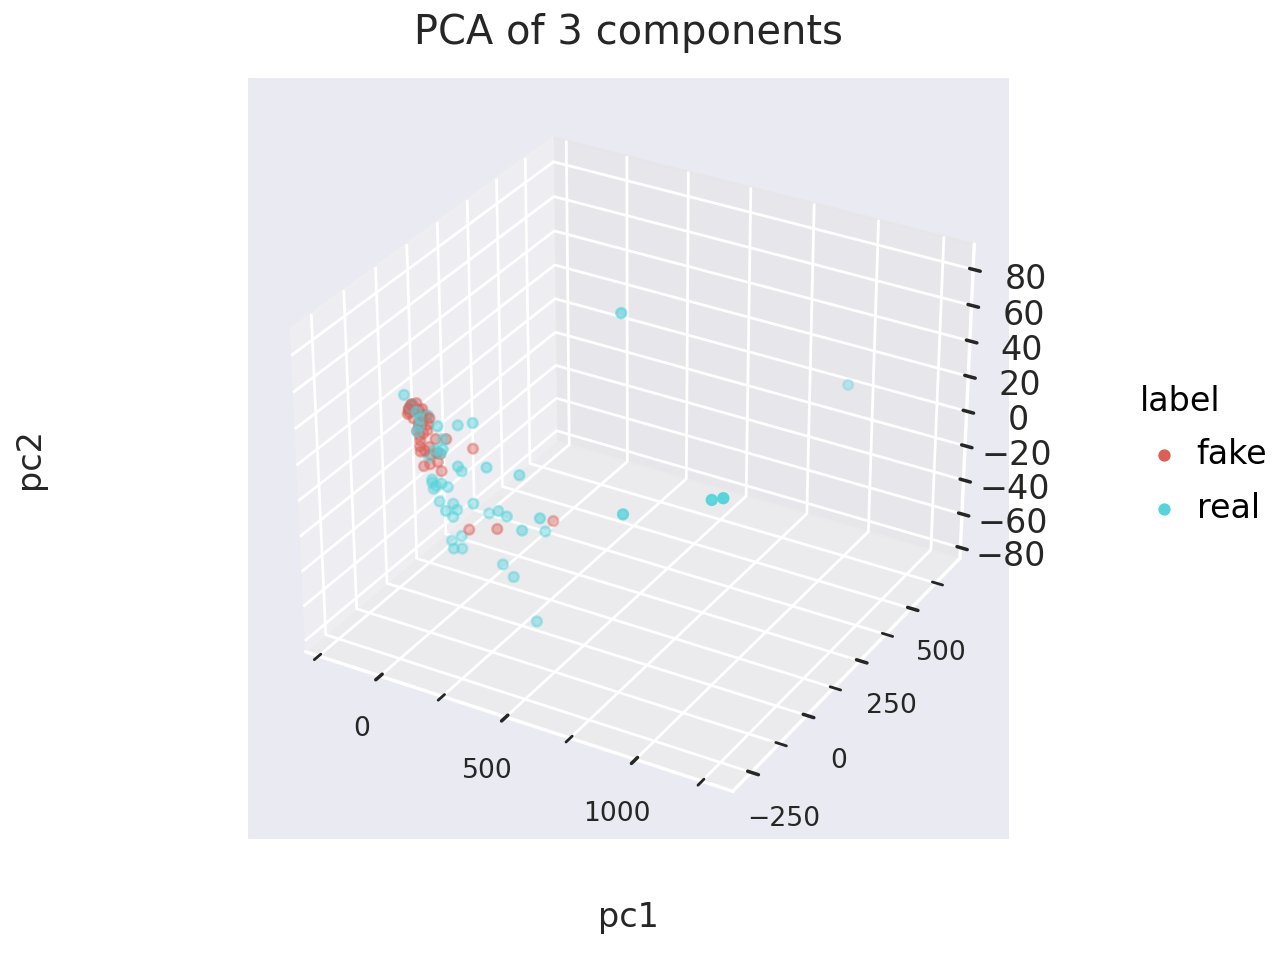

In [4]:
pipeline = Pipeline(similarity=True)
X, y = pipeline.load_dataset_from_file().all
plot_PCA(X, y).draw()

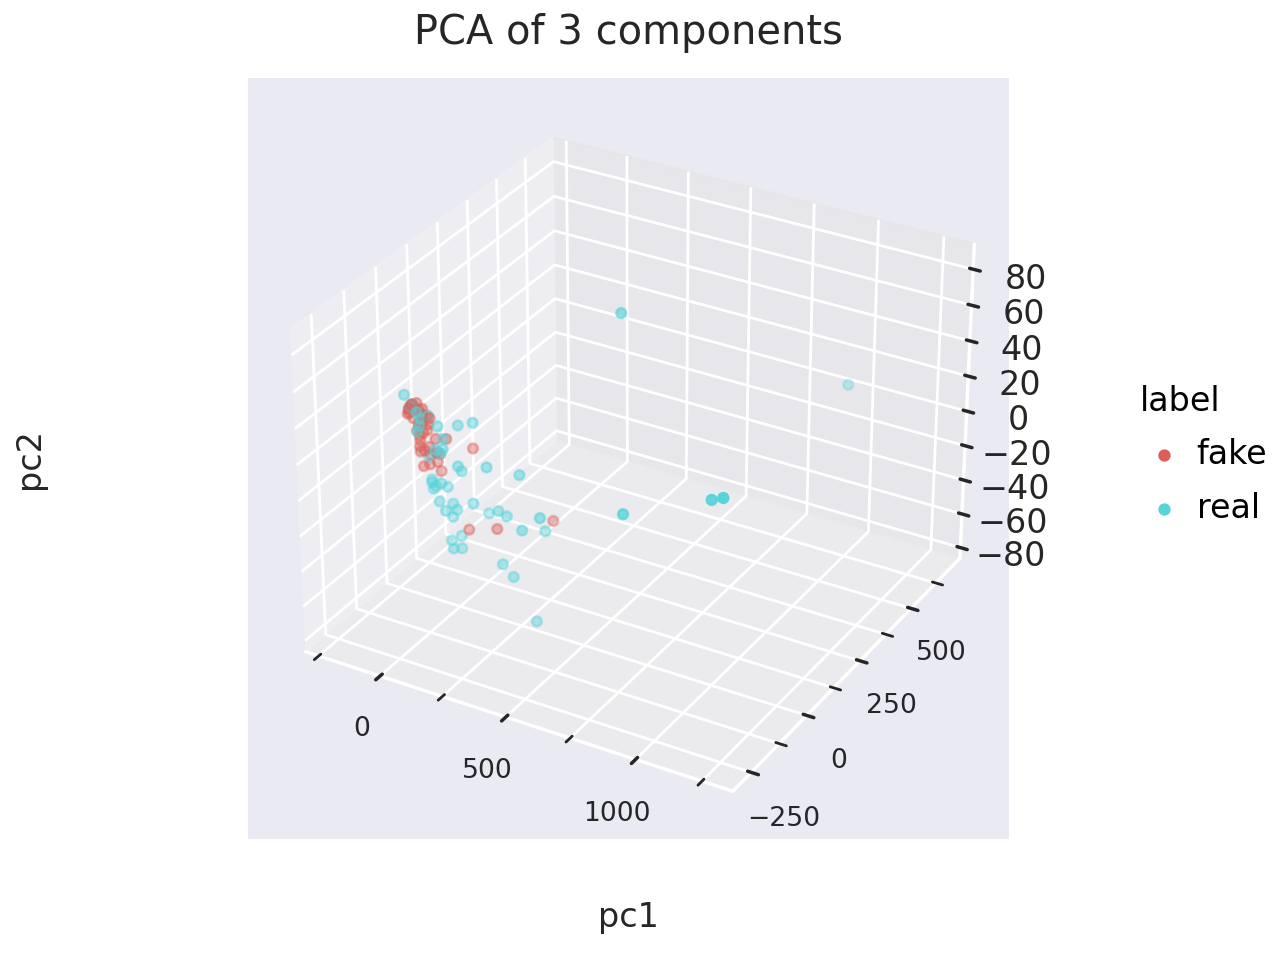

In [5]:
pipeline = Pipeline(similarity=True)
X, y = pipeline.load_dataset_from_file().all
X = X[:, 768:]
plot_PCA(X, y).draw()

In [6]:
def PCA_KMeans(X, y, title="PCA Analysis"):
    dataset = pd.DataFrame(X)
    labels = y

    components = PCA(n_components=2).fit_transform(dataset)
    pca_dataset = pd.DataFrame(components, columns=['pc1', 'pc2'])

    pca_dataset = pd.concat([pca_dataset, pd.DataFrame(labels)], axis=1)
    pca_dataset.rename(columns={0: 'label'}, inplace=True)
    pca_dataset['label'] = pca_dataset['label'].astype('bool')

    pca_plot = (
        pn.ggplot(pca_dataset, pn.aes(
            x='pc1',
            y='pc2',
            color='label')
        )
        + pn.geom_point()
        + pn.scale_color_discrete(labels=['fake', 'real'])

        + pn.ggtitle('PCA with ' + title)

        + pn.theme_538()
        + pn.theme(plot_title=pn.element_text(hjust=0.5))
    )

    kmeans = KMeans(n_clusters=5).fit(pca_dataset)
    pca_dataset['cluster'] = kmeans.labels_
    pca_dataset['cluster'] = pca_dataset['cluster'].astype('category')

    cluster_plot = (
        pn.ggplot(pca_dataset, pn.aes(
            x='pc1',
            y='pc2',
            color='cluster')
        )
        + pn.geom_point()

        + pn.ggtitle('KMeans clustering with ' + title)

        + pn.theme_538()
        + pn.theme(plot_title=pn.element_text(hjust=0.5))
        + pn.theme(legend_position='none')
    )

    return pca_plot, cluster_plot

/home/jimtang/unsw/cs9491/src/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


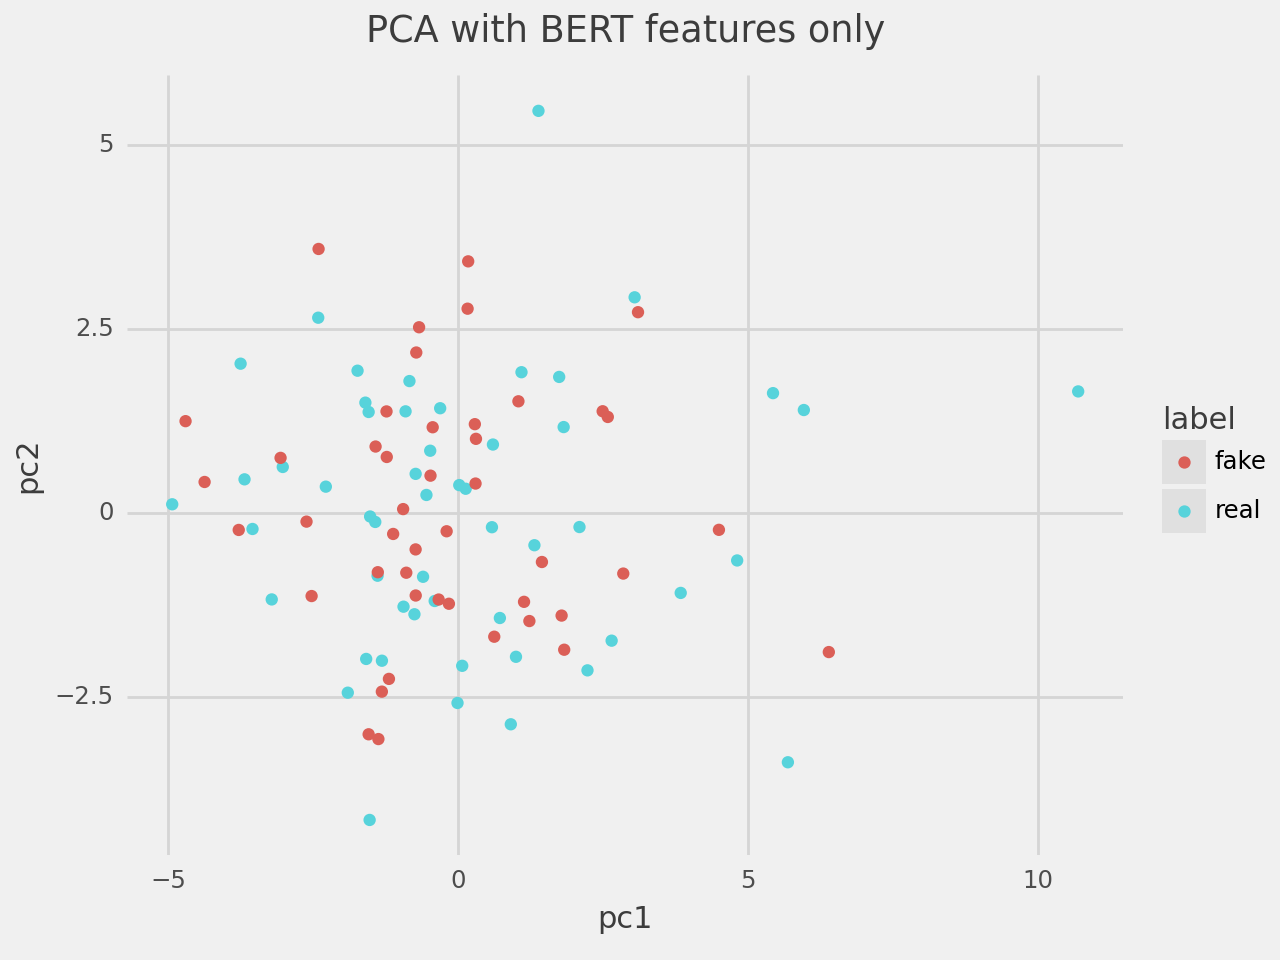

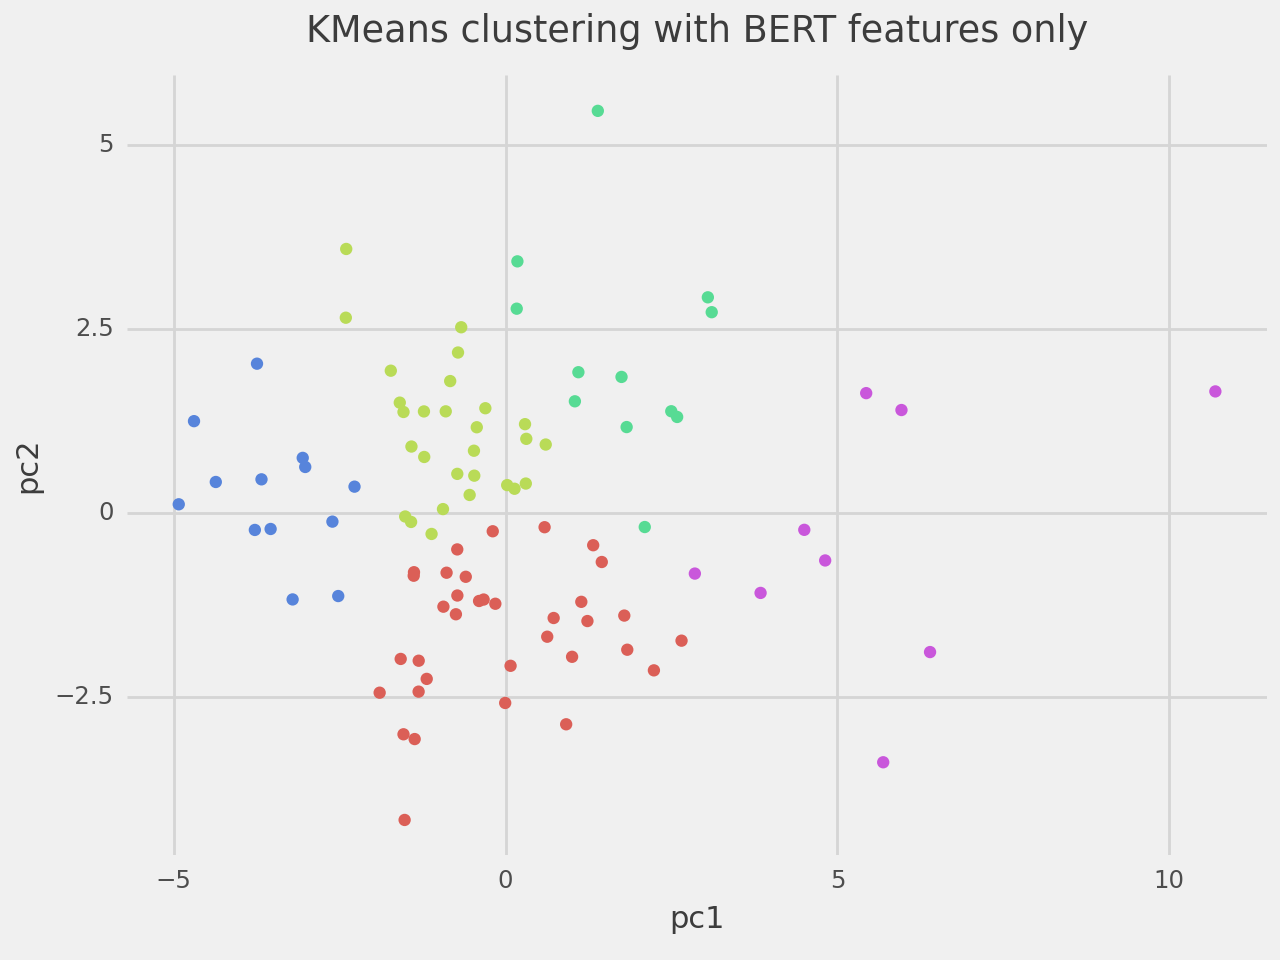

In [7]:
pipeline = Pipeline(similarity=False, non_latent=None)
X, y = pipeline.load_dataset_from_file().all
a, b = PCA_KMeans(X, y, title='BERT features only')
print(a, b)

/home/jimtang/unsw/cs9491/src/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


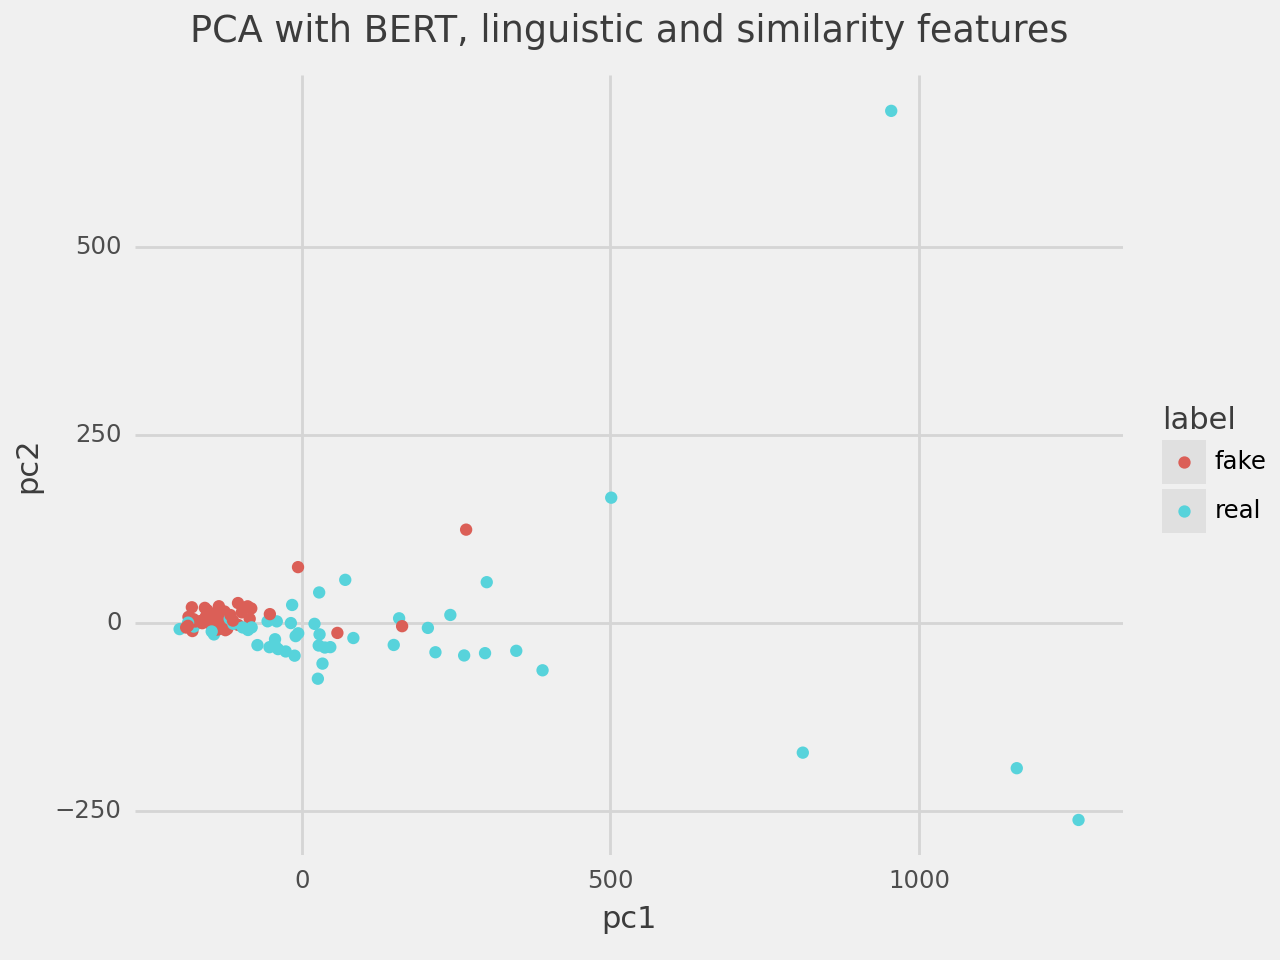

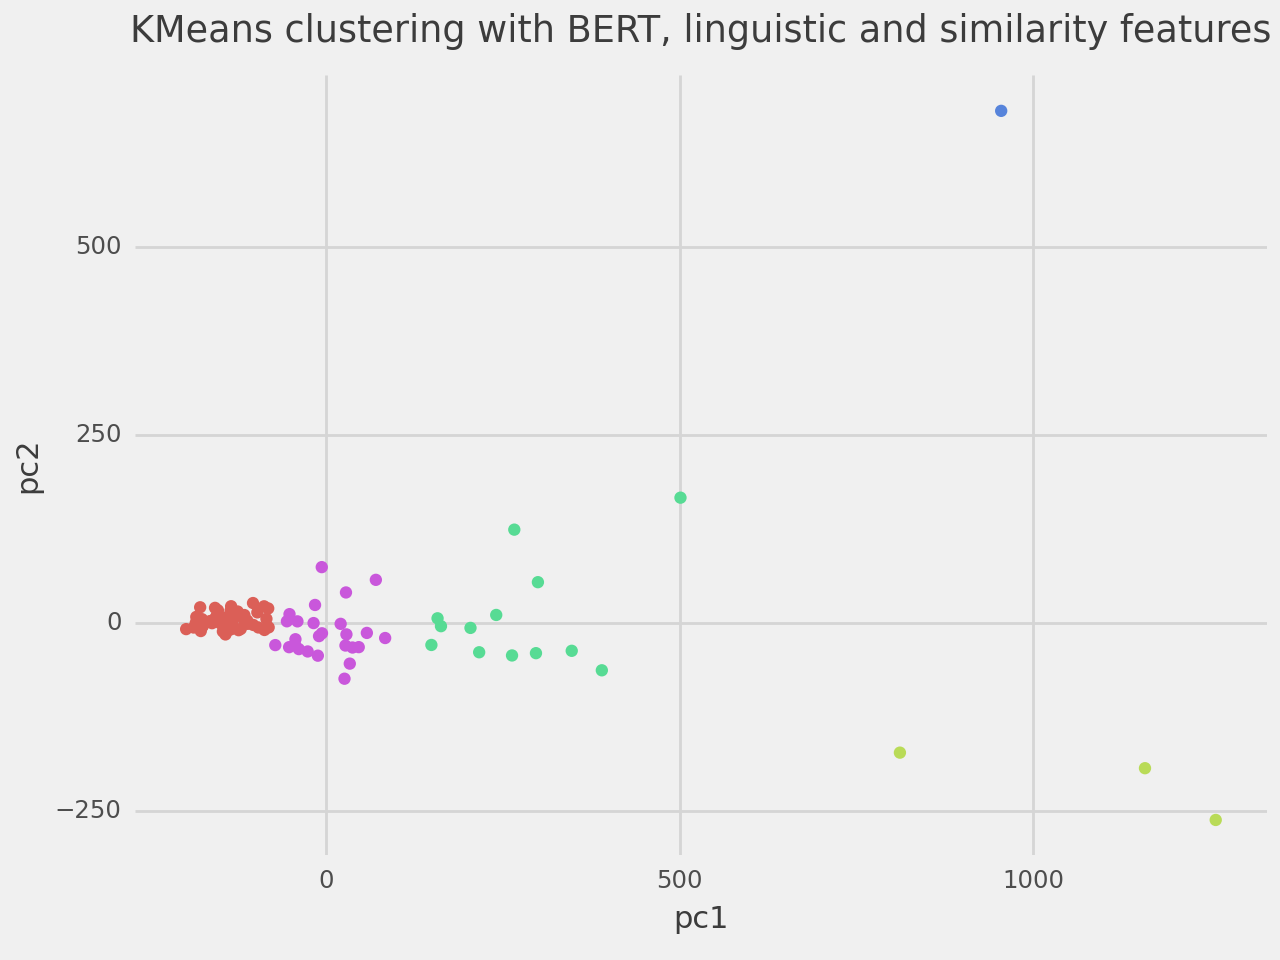

In [8]:
pipeline = Pipeline(similarity=True)
X, y = pipeline.load_dataset_from_file().all
a, b = PCA_KMeans(X, y, title='BERT, linguistic and similarity features')
print(a, b)